# Fussing about with T

In [1]:
%matplotlib notebook

In [2]:
# imports
import numpy as np
from matplotlib import pyplot as plt

from astropy.cosmology import Planck15
from astropy import units
from astropy import constants

import cosmocalc

from yt.utilities.cosmology import Cosmology


## Testing cosomcalc

In [5]:
cosmocalc.get_cosmology()

{'OmegaM': 0.0,
 'OmegaDE': 0.0,
 'OmegaB': 0.0,
 'OmegaK': 0.0,
 'h': 0.0,
 'Sigma8': 0.0,
 'SpectralIndex': 0.0,
 'w0': 0.0,
 'wa': 0.0}

In [6]:
cosmocalc.set_cosmology?

In [8]:
cd = {
    "OmegaM": 0.3,
    "OmegaB": 0.045,
    "OmegaDE": 0.7,
    "OmegaK": 0.0,
    "h": 0.7,
    "Sigma8": 0.8,
    "SpectralIndex": 0.95,
    "w0": -1.0,
    "wa": 0.0,
    "As": 2.1e-9,
    "As_pivot": 0.05}

In [9]:
cosmocalc.set_cosmology(cd)

In [10]:
cosmocalc.get_cosmology()

{'OmegaM': 0.3,
 'OmegaDE': 0.7,
 'OmegaB': 0.045,
 'OmegaK': 0.0,
 'h': 0.7,
 'Sigma8': 0.8,
 'SpectralIndex': 0.95,
 'w0': -1.0,
 'wa': 0.0}

In [11]:
cosmocalc.age(1/1000.)

538353.9799127795

### Planck15

In [18]:
Planck15.Ob0

0.0486

In [19]:
p15_cd = {
    "OmegaM": Planck15.Om0,
    "OmegaB": Planck15.Ob0,
    "OmegaDE": Planck15.Ode0,
    "OmegaK": 0.0,
    "h": Planck15.H0.value/100.,
    "Sigma8": 0.8159,
    "SpectralIndex": 0.9667,
    "w0": -1.0,
    "wa": 0.0,
    "As": 2.1e-9,
    "As_pivot": 0.05}

In [20]:
cosmocalc.set_cosmology(p15_cd)

## yt

In [2]:
co = Cosmology(hubble_constant=0.7, omega_matter=0.3,
               omega_lambda=0.7, omega_curvature=0.0)

In [7]:
co.hubble_time(1e15)

-534873636.71299964 s

## Redshift

In [4]:
z = 10**np.linspace(np.log10(6.), 4, 1000)

## Temperature

In [5]:
Tcmb = Planck15.Tcmb(z)

## Ages

In [7]:
age = 152 * (0.1 * units.MeV / constants.k_B / Tcmb) * units.s

In [8]:
age[-1].to('s')

<Quantity 6471146.5128701 s>

### Ok for z<10,000

In [9]:
age = Planck15.age(z)

### Plot

<IPython.core.display.Javascript object>


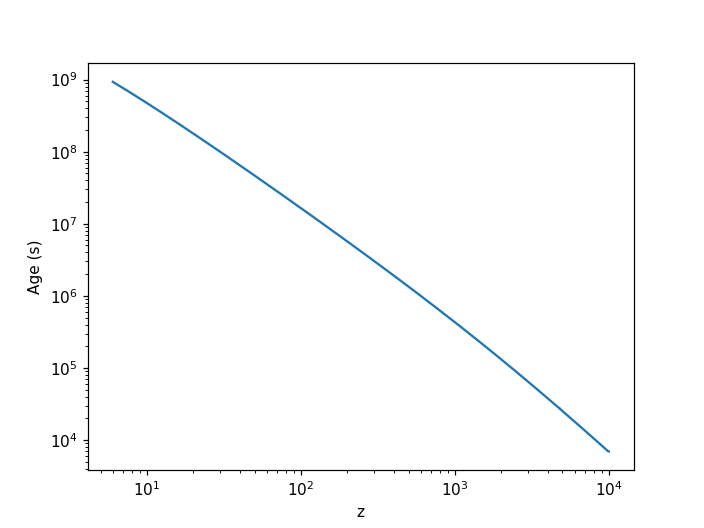

In [11]:
plt.clf()
ax = plt.gca()
ax.plot(z, age.to('year'))
#
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposx='clip')
#
ax.set_xlabel('z')
ax.set_ylabel('Age (s)')
plt.show()

### Plot

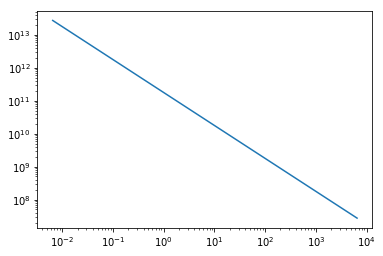

In [42]:
plt.clf()
ax = plt.gca()
#
#ax.plot(ages*units.year.to('s'), Tcmb)
ax.plot(age.to('s'), Tcmb)
#
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposx='clip')
#
plt.show()